In [1]:
#BIG DATA MINI PROJECT 

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
#here we have read or csv file  
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\sales.csv')

In [6]:
df.shape

(1000, 17)

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
#gives information in the file 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
#check for null values
pd.isnull(df).sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
# drop null values
df.dropna(inplace=True)

In [11]:
# change data type
df['Unit price'] = df['Unit price'].astype('int')

In [12]:
df['Unit price'].dtypes

dtype('int32')

In [13]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [14]:
# describe() method returns description of the data in the DataFrame
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.163000,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.481082,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.000000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.000000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.000000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.000000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.000000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


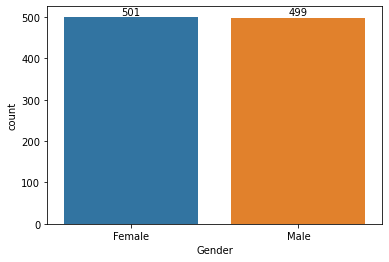

In [15]:
#GENDER
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Unit price'>

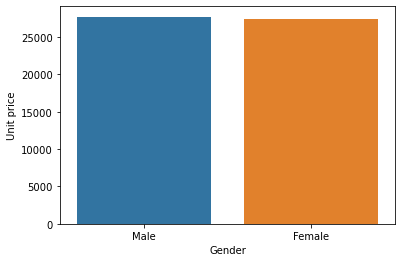

In [16]:
# plotting a bar chart for gender vs Unit price

sales_gen = df.groupby(['Gender'], as_index=False)['Unit price'].sum().sort_values(by='Unit price', ascending=False)

sns.barplot(x = 'Gender',y= 'Unit price' ,data = sales_gen)

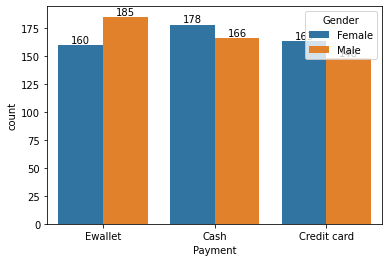

In [17]:
#graph for payment methods
ax = sns.countplot(data = df, x = 'Payment', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='City', ylabel='Rating'>

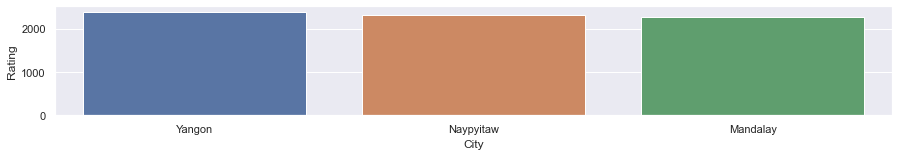

In [19]:
# total number of ratings from top 3 Cities

sales_state = df.groupby(['City'], as_index=False)['Rating'].sum().sort_values(by='Rating', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,2)})
sns.barplot(data = sales_state, x = 'City',y= 'Rating')

In [21]:
city_name = 'Yangon'  
filtered_df = df[df['City'] == city_name]
filtered_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


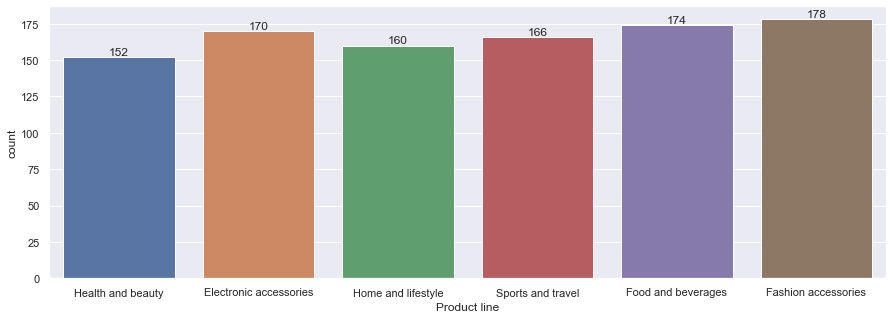

In [40]:
#graph for the product line
ax = sns.countplot(data = df, x = 'Product line')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product line', ylabel='Unit price'>

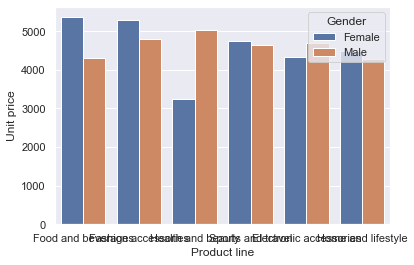

In [43]:
#graph for product line nad its unit price 
sales_state = df.groupby(['Product line', 'Gender'], as_index=False)['Unit price'].sum().sort_values(by='Unit price', ascending=False)

sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data = sales_state, x = 'Product line',y= 'Unit price', hue='Gender')

<AxesSubplot:xlabel='Invoice ID', ylabel='gross income'>

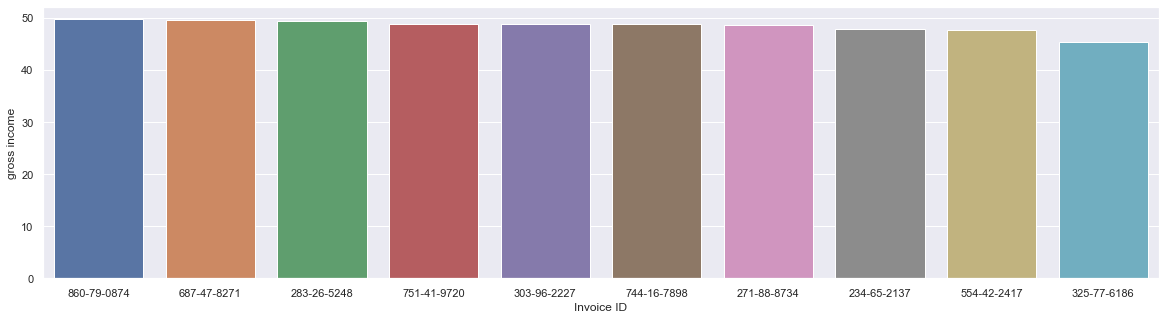

In [46]:
#graph for invoice id and gross income 
sales_state = df.groupby(['Invoice ID'], as_index=False)['gross income'].sum().sort_values(by='gross income', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Invoice ID',y= 'gross income')